In [32]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

from sklearn.decomposition import PCA
from sklearn.datasets import load_digits 

%matplotlib inline 

# Introduce PCA

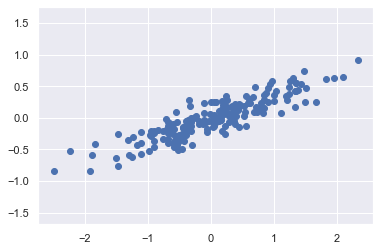

In [48]:
rng = np.random.RandomState(1)

X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.show()

In [49]:
# finding principal axes in the data 
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [50]:
print(pca.components_)         # components 

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [51]:
print(pca.explained_variance_)       # explain variance

[0.7625315 0.0184779]


In [52]:
def draw_vector(v0, v1, ax=None): 
    """Utility function to visualize principal axes (components/vectors).
    
    Parameters: 
    - v0: first principal components (vector and length). 
    - v1: second principal components (vector and length)."""
    ax = ax or plt.gca()
    
    arrowprops = dict(arrowstyle = '->', linewidth=2, shrinkA=0, shrinkB=0, color='black')
    
    ax.annotate('', v1, v0, arrowprops=arrowprops)

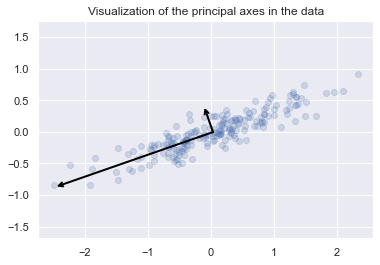

In [53]:
# plot data and principal components 

plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_): 
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

plt.title('Visualization of the principal axes in the data')
plt.axis('equal')
plt.show()

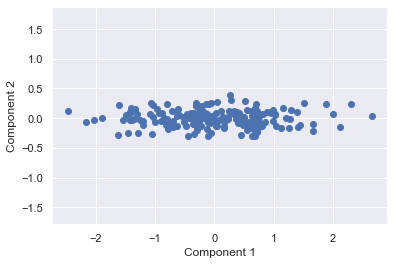

In [54]:
projected = pca.transform(X)

plt.scatter(projected[:, 0], projected[:, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.axis('equal')
plt.show()

# PCA as dimensionality reduction 

In [58]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)     # apply dimensionlity reduction to X          

print('Original shape: ', X.shape)
print('Transformed shape: ', X_pca.shape)

Original shape:  (200, 2)
Transformed shape:  (200, 1)


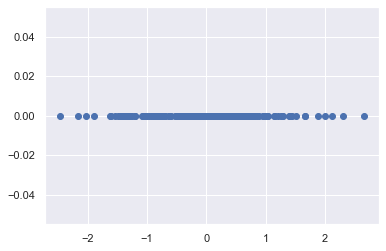

In [59]:
plt.scatter(X_pca, np.zeros_like(X_pca))
plt.show()

The transformed data has been reduced to a single dimension.

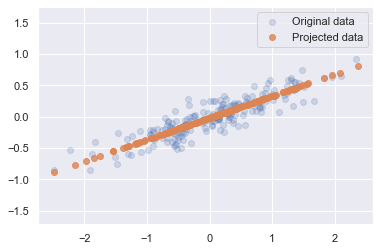

In [42]:
X_new = pca.inverse_transform(X_pca)    # transform data back to its 

plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.legend(['Original data', 'Projected data'])
plt.axis('equal')
plt.show()

# PCA for visualization: handwritten digits 

In [43]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [44]:
pca = PCA(2)                                      # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)        # apply dimensionlity reduction to X

print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


C:\Users\admin\AppData\Local\Temp/ipykernel_17480/1800148428.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


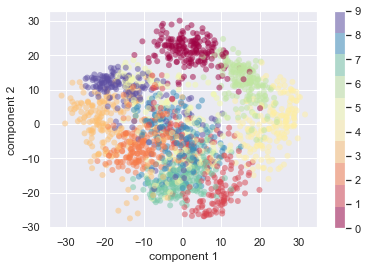

In [45]:
# plot the first 2 principal components of each point 
plt.scatter(projected[:, 0], projected[:, 1], 
            c=digits.target, edgecolor='none', alpha=0.5, 
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

# Choosing the number of components 

Cumulative *explained variance ratio*: measure how well PCA preserves the content of the data.

In [46]:
digits.data.shape

(1797, 64)

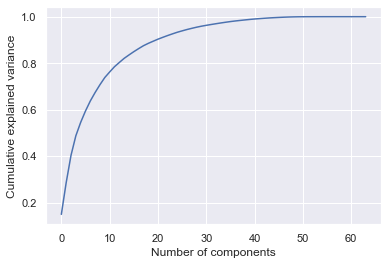

In [47]:
pca = PCA().fit(digits.data)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()